In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [50]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [51]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [52]:
df_copy = df.copy()
df_copy

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [53]:
df_copy['FullDate']= pd.to_datetime(df_copy['FullDate'])
df_copy.head()
df_copy = df_copy.set_index('FullDate') 
df_daily = df_copy.resample('D').mean()

Text(0, 0.5, 'ElecPrice')

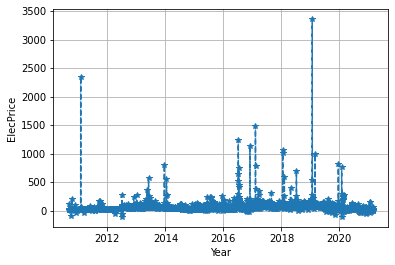

In [55]:
plt.plot(df_daily.index, df_daily.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')

In [57]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f' {k}: {v}')

ADF Statistic: -3.6901589888366413
p-value: 0.0042537255045741835
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1%: -3.432070672988693
 5%: -2.8623002987378547
 10%: -2.567174716967499


In [58]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f' {k}: {v}')

ADF Statistic: -2.902766697165181
p-value: 0.045027212884625294
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4320693157877544
 5%: -2.8622996992165364
 10%: -2.5671743978048323


In [38]:
df_copy = df_copy.drop(columns = ['Tmax', 'SysLoad', 'GasPrice'])
df_copy.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [40]:
df_copy["ds"] = pd.to_datetime(df_copy["ds"])

In [41]:
df_daily = df_copy.resample('D').mean()

TypeError: ignored

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
len(df)

92016

In [61]:
a = 2757 / len(df)
a

0.029962180490349506

In [62]:
1- a

0.9700378195096505

In [63]:
x = df.drop(columns = 'ElecPrice' )

In [ ]:
y = df['ElecPrice']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9700378195096505, random_state=0)

In [ ]:
len(x_train)

2757

In [ ]:
len(x_test)

89259

In [74]:
from prophet import Prophet

In [ ]:
len(df)

92016

In [83]:
df_train, df_test = train_test_split(df, test_size=0.9700378195096505, random_state=0)

In [84]:
len(df_train)

2757

In [85]:
df_train.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
10732,2011-11-22 04:00:00,21.7,921.52745,3.7200,24.525
32553,2014-05-19 09:00:00,22.1,1204.94515,3.7500,56.785
46788,2016-01-02 12:00:00,26.6,373.92230,5.2345,21.275
88580,2020-10-08 20:00:00,15.7,682.55020,5.0100,51.835
77875,2019-07-20 19:00:00,20.2,109.61970,8.5000,97.025


In [86]:
df_train[ 'FullDate' ]= pd.to_datetime(df_train[ 'FullDate' ])

In [87]:
df_train = df_train.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })

In [88]:
df_train.head()

,ds,Tmax,SysLoad,GasPrice,y
10732,2011-11-22 04:00:00,21.7,921.52745,3.7200,24.525
32553,2014-05-19 09:00:00,22.1,1204.94515,3.7500,56.785
46788,2016-01-02 12:00:00,26.6,373.92230,5.2345,21.275
88580,2020-10-08 20:00:00,15.7,682.55020,5.0100,51.835
77875,2019-07-20 19:00:00,20.2,109.61970,8.5000,97.025


In [89]:
df_train = df_train.drop(columns = ['Tmax', 'SysLoad', 'GasPrice'])

In [90]:
df_train.head()

,ds,y
10732,2011-11-22 04:00:00,24.525
32553,2014-05-19 09:00:00,56.785
46788,2016-01-02 12:00:00,21.275
88580,2020-10-08 20:00:00,51.835
77875,2019-07-20 19:00:00,97.025


In [91]:
model = Prophet()
model.fit(df_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2aay035r/pc6nvcvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2aay035r/ow0yvait.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53486', 'data', 'file=/tmp/tmp2aay035r/pc6nvcvp.json', 'init=/tmp/tmp2aay035r/ow0yvait.json', 'output', 'file=/tmp/tmpo20vdbi0/prophet_model-20221004224543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:45:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [92]:
future = model.make_future_dataframe(periods= 10 , freq= 'M' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-02 19:00:00,110.184538,-325.592045,568.881998,13.885287,13.885287,13.885287
1,2010-09-04 21:00:00,-2.327498,-485.457549,442.846937,13.990425,13.990425,13.990425
2,2010-09-05 04:00:00,-73.524034,-534.818073,378.924828,14.005145,14.005145,14.005145
3,2010-09-05 10:00:00,-42.160378,-486.197184,399.924632,14.017761,14.017761,14.017761
4,2010-09-05 11:00:00,-39.046045,-484.952960,379.583859,14.019864,14.019864,14.019864
...,...,...,...,...,...,...,...
2762,2021-07-31 17:00:00,-35.340544,-518.526193,420.572689,-23.153708,-25.259364,-21.328842
2763,2021-08-31 17:00:00,-36.183855,-504.752964,399.498762,-28.477130,-31.344646,-25.899883
2764,2021-09-30 17:00:00,18.173397,-458.052823,489.827097,-33.628830,-37.359710,-30.248314
2765,2021-10-31 17:00:00,-57.843605,-524.067351,389.306386,-38.952252,-43.849369,-34.476447


In [95]:
from sklearn.metrics import mean_absolute_percentage_error
mape = (mean_absolute_percentage_error(df_test,forecast))
round(mape,3)

ValueError: ignored

In [77]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [78]:
df_train, df_test = train_test_split(df, test_size=0.9700378195096505, random_state=0)

In [79]:
df_test.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
45814,2015-11-22 22:00:00,20.9,818.33800,3.8000,37.070
24029,2013-05-29 05:00:00,22.1,307.33975,4.9450,42.660
81525,2019-12-19 21:00:00,45.2,2157.68180,9.0000,101.245
60948,2017-08-14 12:00:00,22.3,1016.44870,5.8900,102.950
15712,2012-06-16 16:00:00,16.1,587.06510,5.1333,32.630


In [80]:
df_train[ 'FullDate' ]= pd.to_datetime(df_train[ 'FullDate' ])

In [81]:
df_train = df_train.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" , 'Tmax' : 'add2', 'SysLoad' : 'add1', 'GasPrice' :'add3'})

In [82]:
df_train.head()

,ds,add2,add1,add3,y
10732,2011-11-22 04:00:00,21.7,921.52745,3.7200,24.525
32553,2014-05-19 09:00:00,22.1,1204.94515,3.7500,56.785
46788,2016-01-02 12:00:00,26.6,373.92230,5.2345,21.275
88580,2020-10-08 20:00:00,15.7,682.55020,5.0100,51.835
77875,2019-07-20 19:00:00,20.2,109.61970,8.5000,97.025


In [ ]:
model = Prophet()
model.fit(df_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2uxglz2/hm1hhpnp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2uxglz2/kk2dikpy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17983', 'data', 'file=/tmp/tmpz2uxglz2/hm1hhpnp.json', 'init=/tmp/tmpz2uxglz2/kk2dikpy.json', 'output', 'file=/tmp/tmpml0j9tqd/prophet_model-20221004174514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:45:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:45:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods= 10 , freq= 'M' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-02 19:00:00,110.184538,-369.615517,544.676601,13.885287,13.885287,13.885287
1,2010-09-04 21:00:00,-2.327498,-500.023887,484.102371,13.990425,13.990425,13.990425
2,2010-09-05 04:00:00,-73.524034,-509.655581,383.046828,14.005145,14.005145,14.005145
3,2010-09-05 10:00:00,-42.160378,-465.385767,469.260452,14.017761,14.017761,14.017761
4,2010-09-05 11:00:00,-39.046045,-538.538030,425.099765,14.019864,14.019864,14.019864
...,...,...,...,...,...,...,...
2762,2021-07-31 17:00:00,-35.340544,-520.264758,382.187178,-23.153708,-25.003537,-21.184135
2763,2021-08-31 17:00:00,-36.183855,-488.880875,428.514783,-28.477130,-31.139548,-25.739992
2764,2021-09-30 17:00:00,18.173397,-414.878449,494.665296,-33.628830,-37.207530,-29.886317
2765,2021-10-31 17:00:00,-57.843605,-492.746111,410.407864,-38.952252,-43.463937,-34.244537


In [ ]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.9700378195096505, random_state=0)

In [ ]:
df_test.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
45814,2015-11-22 22:00:00,20.9,818.33800,3.8000,37.070
24029,2013-05-29 05:00:00,22.1,307.33975,4.9450,42.660
81525,2019-12-19 21:00:00,45.2,2157.68180,9.0000,101.245
60948,2017-08-14 12:00:00,22.3,1016.44870,5.8900,102.950
15712,2012-06-16 16:00:00,16.1,587.06510,5.1333,32.630


In [ ]:
df_test_ffill = df_test.fillna(method='ffill')
df_test_ffill.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [ ]:
df_test_ffill[ 'FullDate' ]= pd.to_datetime(df_test_ffill[ 'FullDate' ])

In [ ]:
df_test_ffill = df_test_ffill.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" , 'Tmax' : 'add2', 'SysLoad' : 'add1', 'GasPrice' :'add3'})

In [ ]:
df_test_ffill.isnull().sum()

ds      0
add2    0
add1    0
add3    0
y       0
dtype: int64

In [ ]:
model = Prophet()
model.fit(df_test_ffill)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2uxglz2/gtsql0fh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz2uxglz2/rgj8912h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44637', 'data', 'file=/tmp/tmpz2uxglz2/gtsql0fh.json', 'init=/tmp/tmpz2uxglz2/rgj8912h.json', 'output', 'file=/tmp/tmpl4brl8fl/prophet_model-20221004180833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods= 10 , freq= 'M' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01 00:00:00,26.810900,-242.817692,275.258785,32.319126,32.319126,32.319126
1,2010-09-01 01:00:00,23.491253,-249.866501,276.778701,32.320090,32.320090,32.320090
2,2010-09-01 02:00:00,13.863545,-241.886545,267.335752,32.321054,32.321054,32.321054
3,2010-09-01 03:00:00,4.095345,-249.967167,264.563457,32.322017,32.322017,32.322017
4,2010-09-01 04:00:00,1.751201,-266.205420,254.142292,32.322981,32.322981,32.322981
...,...,...,...,...,...,...,...
89264,2021-08-31 23:00:00,-26.340612,-276.987533,231.136117,-18.376316,-34.468476,-2.147351
89265,2021-09-30 23:00:00,-28.358812,-296.676520,245.937561,-22.703721,-43.172024,-1.757423
89266,2021-10-31 23:00:00,-50.470317,-315.417387,191.705913,-27.175372,-54.153496,-1.224564
89267,2021-11-30 23:00:00,-41.906241,-312.952736,232.891376,-31.502776,-64.930386,-0.868659
